In [17]:
import csv
import os.path
from os import listdir
import re 
from PIL import Image
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

cwd = os.getcwd()
data_path=os.path.join(cwd, "data/face_mask/")

(1024, 1392)


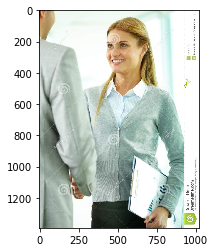

In [9]:


def default_loader(path):
    return Image.open(path).convert('RGB')

file_path = data_path + 'JPEGImages/1_Handshaking_Handshaking_1_35.jpg'
%matplotlib inline
img = default_loader(file_path)
print(img.size)
plt.imshow(img)

In [16]:
annotation_path = file_path.replace(".jpg",".xml").replace("JPEGImages","Annotations")

tree = ET.parse(annotation_path)
root = tree.getroot()
for elem in root:
    print(elem)

<Element 'folder' at 0x7f9348fe2770>
<Element 'filename' at 0x7f9348fe2710>
<Element 'source' at 0x7f9348fe2590>
<Element 'size' at 0x7f9348fe2230>
<Element 'segmented' at 0x7f9348fe2050>
<Element 'object' at 0x7f9348fe21d0>


In [32]:
my_data_path=os.path.join(cwd, "data/face_mask/") 
annotation_path = my_data_path+"Annotations"
annotations = [f for f in listdir(annotation_path)]
annotation = ET.parse(annotation_path+'/'+annotations[0])
eval(annotation)['annotation'][0]['name']

TypeError: eval() arg 1 must be a string, bytes or code object

In [34]:
annotation.getroot()

<Element 'annotation' at 0x7f93481008f0>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
from torchvision.models import ResNet


def default_loader(path):
    return Image.open(path).convert('RGB')

my_data_path=os.path.join(cwd, "data/face_mask/") 
class MyDataset(Dataset):
    def __init__(self, data_path=my_data_path, transform=None, target_transform=None, loader=default_loader):
        super(MyDataset, self).__init__()
        file_path = data_path + '0_annotation_train.txt'
        annotation_path = data_path+"Annotations"
        file = open(file_path, 'r')
        imgs=[]
        annotations = []
        for line in file:
            label_string = eval(line)['annotation'][0]['name']
            label_idx = label2idx[label_string]
            img_path = data_path + '/'.join(eval(line)['source'].split('/')[-2:])
            imgs.append([img_path,label_idx])
            annotation_path = data_path+'annotations/'+'/'.join(eval(line)['source'].split('/')[-2:]).replace(".jpg",".xml").replace(".png",".xml")
            annotations.append(annotation_path)
        self.imgs = imgs
        self.annotations = annotations
        self.transform=transform
        self.traget_transform = target_transform
        self.loader=  loader
        self.data_path = data_path
    def __getitem__(self, index):
        imgPath, label = self.imgs[index]
        img = self.loader(imgPath)
        if self.transform is not None:
            img = self.transform(img)
            classification = int(label)
            bndbox = root.find('object').find('bndbox')
            width = float(root.find('size').find('width').text)
            height =float(root.find('size').find('height').text)
            xmin = float(bndbox.find('xmin').text)/width
            ymin = float(bndbox.find('ymin').text)/height
            xmax = float(bndbox.find('xmax').text)/width
            ymax = float(bndbox.find('ymax').text)/height
            label = torch.from_numpy(np.array([xmin,ymin,xmax,ymax]))
        return img, label
    def __len__(self):
        return len(self.imgs)

In [36]:
import PIL
print(PIL)

<module 'PIL' from '/home/arky/anaconda3/lib/python3.7/site-packages/PIL/__init__.py'>
